In [1]:
from Autoencoder_utils import Load_data, display_data, sigmoid, sigmoidGradient, Autoencoder_Initialize_Weights
from Autoencoder_utils import Autoencoder_cross_entropy_loss, Autoencoder_nnCostFunction, Autoencoder_forward_prop
from Autoencoder_utils import Autoencoder_backprop, Autoencoder_Train_network, Train_network_denoise, Denoise_X
import numpy as np, csv, matplotlib.pyplot as plt, random
import matplotlib

%matplotlib inline

In [2]:
# ---------------Load & Visualize the training data------------------------
train_file_path = 'digitstrain.txt'
val_file_path = 'digitsvalid.txt'
test_file_path = 'digitstest.txt'
X_train, Y_train = Load_data(train_file_path)
X_val, Y_val = Load_data(val_file_path)
X_test, Y_test = Load_data(test_file_path)
print("Data Loaded...")
#display_data(X_train)

Data Loaded...


# Denoising Autoencoder

Only the input is modified

In [4]:
#-------------------------------Network Architecture-----------------------
input_layer_size = 784
hidden_layer_size = 100                # List Sizes of the hidden layer
output_layer_size = input_layer_size
n_hidden = 1
layer_sizes=[input_layer_size, hidden_layer_size, output_layer_size]

# -------------------------Set Activation Function---------------------------
activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

#----------------------------- Hyper Parameters -----------------------
epochmax = 80
LearningRate = 0.001
reg_lambda = 0.2
momentum = 0.0
minibatchsize = 40 #Set =1 for regular stochastic gradient descent
p = 0.1 #Dropout Probability

#---------------Initialize Tied weights for all the layers:---------------
nn_weight_list = []
W = Autoencoder_Initialize_Weights((input_layer_size, hidden_layer_size)) #784 x 100
bias1 = np.zeros((hidden_layer_size,1))
bias2 = np.zeros((input_layer_size,1))
nn_weight_list = [W, bias1, bias2]

# ---------------Training Network------------------------
train_cost, val_cost, nn_weight_list = Train_network_denoise(epochmax, reg_lambda, LearningRate, minibatchsize, 
                                                             nn_weight_list, layer_sizes, momentum,  activ_func, 
                                                             activ_Grad_func, X_train, X_val, p)
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)


Training Neural net....
('epochmax: 80', ' L2 Regularization: 0.200', ' Learning rate: 0.00', 'Momentum : 0.000', ' Layer Sizes', [784, 100, 784])
Time 0
Cross Entropy 	 Training:  164.303358951 	 Validation:  165.284952033
Time 10
Cross Entropy 	 Training:  111.445735158 	 Validation:  113.635532625
Time 20
Cross Entropy 	 Training:  103.058619704 	 Validation:  105.782599548
Time 30
Cross Entropy 	 Training:  99.4716769326 	 Validation:  102.443936394
Time 40
Cross Entropy 	 Training:  99.0573356905 	 Validation:  102.054187318
Time 50
Cross Entropy 	 Training:  99.0568465638 	 Validation:  102.053675555
Time 60
Cross Entropy 	 Training:  99.0568452232 	 Validation:  102.053674277
Time 70
Cross Entropy 	 Training:  99.0568452222 	 Validation:  102.053674276
('epochmax: 80', ' L2 Regularization: 0.200', ' Learning rate: 0.00', ' Layer Sizes', [784, 100, 784])


('epochmax: 80', ' L2 Regularization: 0.200', ' Learning rate: 0.00', ' Layer Sizes', [784, 100, 784])
Train 99.0568452222
Val 102.053674276
Test 98.5816533772


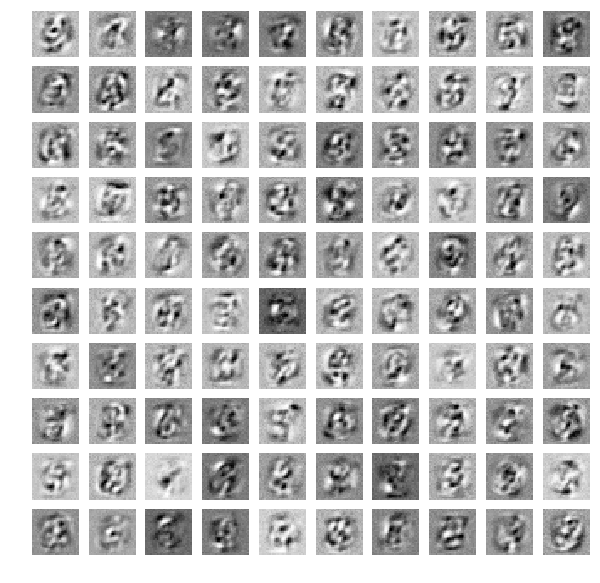

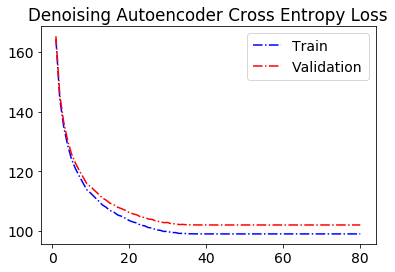

In [5]:
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
J_train, activations = Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_train, reg_lambda)
print 'Train', J_train

J_val, _ = Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_val, reg_lambda)
print 'Val',J_val

J_test, activations  = Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_test, reg_lambda)
print 'Test',J_test

# ---------------Plotting Results------------------------
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0].reshape((28,28,100))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[:,:,i-1], cmap=plt.cm.Greys)
    ax.axis('off')
#plt.savefig('DN_Autoencoder_features.png',dpi = 200)
plt.show()

plt.figure()
time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Denoising Autoencoder Cross Entropy Loss')
#plt.savefig('DN_Autoencoder_loss.png',dpi = 200)


In [6]:
DN_Autoencoder_trained_weights = nn_weight_list

In [7]:
import pickle
pickle.dump( DN_Autoencoder_trained_weights, open( "DN_Autoencoder_trained_weights.p", "wb" ) )

# Using Neural network with pretrained weights from Autoencoder

In [3]:
from utils import randInitializeWeights, Unroll_weights, forward_prop, cross_entropy_loss, Roll_weights, backprop
from utils import Tanh, TanhGradient, ReLu, ReLuGradient, Mean_classification_error, Train_network

In [7]:
import pickle
DN_Autoencoder_trained_weights = pickle.load( open( "DN_Autoencoder_trained_weights.p", "rb" ) )

In [6]:
from utils import randInitializeWeights, Unroll_weights, forward_prop, cross_entropy_loss, Roll_weights, backprop
from utils import Tanh, TanhGradient, sigmoidGradient,sigmoid, ReLu, ReLuGradient, Mean_classification_error, Train_network


Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.000', ' Learning rate: 0.05', 'Momentum : 0.900', ' Layer Sizes', [784, 100, 10])
Time 0
Cross Entropy 	 Training:  0.562582589783 	 Validation:  0.751866062145
Mean  Error : 	 Training:  0.0966666666667 	 Validation: 0.131
Time 10
Cross Entropy 	 Training:  0.0212843092394 	 Validation:  0.480764908474
Mean  Error : 	 Training:  0.000333333333333 	 Validation: 0.075
Time 20
Cross Entropy 	 Training:  0.0204346715906 	 Validation:  0.480733706019
Mean  Error : 	 Training:  0.000333333333333 	 Validation: 0.074
Time 30
Cross Entropy 	 Training:  0.0204339506632 	 Validation:  0.480733025201
Mean  Error : 	 Training:  0.000333333333333 	 Validation: 0.074
Time 40
Cross Entropy 	 Training:  0.0204339499613 	 Validation:  0.480733024669
Mean  Error : 	 Training:  0.000333333333333 	 Validation: 0.074
('epochmax: 50', ' L2 Regularization: 0.000', ' Learning rate: 0.05', ' Layer Sizes', [784, 100, 10])
Train 0.0204339499606 0.00

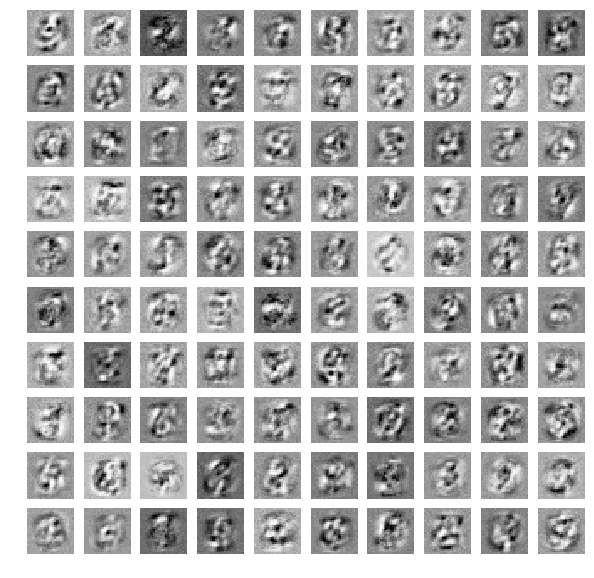

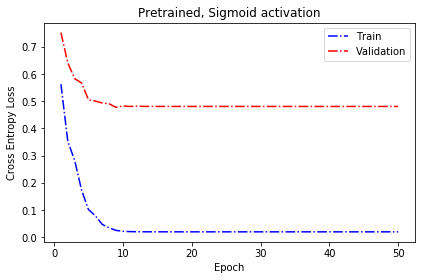

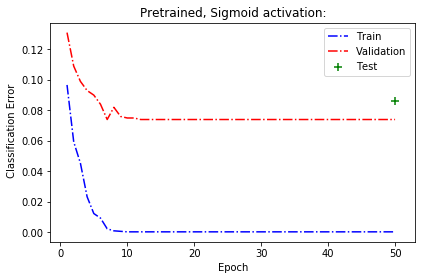

In [8]:
#Autoencoder_trained_weights = nn_weight_list
#-------------------------------Network Architecture-----------------------
n_hidden=1
input_layer_size=784
hidden_layer_size=[100]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)

# ----------------------------- Initializing Params------------------------
nn_weight_list = []
#RBM_trained_weights[0]--> W --> L_in x L_hid
#RBM_trained_weights[1]--> b --> #Size 100 L_hid
#RBM_trained_weights[2]--> c --> #Size 784 L_in
#W0 -- > L_out, 1 + L_in
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    if i==0:
        W = np.vstack((DN_Autoencoder_trained_weights[0],DN_Autoencoder_trained_weights[1].T)).T
    else:
        W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)

""" The parameters for the neural network are "unrolled" into the vector nn_params
and need to be converted back into the weight matrices"""
nnparams = Unroll_weights(nn_weight_list, layer_sizes)

#------------------------------ Hyper Parameters ----------------------------
epochmax = 50
LearningRate = 0.05
reg_lambda = 0.0001
minibatchsize = 32#Set =1 for regular stochastic gradient descent
momentum = 0.9
# -------------------------Set Activation Function----------------------------
activ_func = sigmoid
activ_Grad_func = sigmoidGradient

# ----------------------------Training Network--------------------------------
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, layer_sizes, minibatchsize, momentum,  activ_func, activ_Grad_func, X_train, Y_train, X_val, Y_val)

print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

# ---------------Plotting Results------------------------
print "Test Performance is", 100.0*(1-mean_err),'%'


time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
#plt.savefig('NN_DAE_pretrained_weights.png',dpi = 200)
plt.show()

plt.figure()
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Pretrained, Sigmoid activation')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.tight_layout()
#plt.savefig('NN_DAE_pretrained_loss.png',dpi = 200)

plt.figure()
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Pretrained, Sigmoid activation:')
plt.xlabel('Epoch')
plt.ylabel(' Classification Error')
plt.tight_layout()
#plt.savefig('NN_DAE_pretrained_error.png',dpi = 200)


# Number of hidden units in denoised autoencoder

In [9]:
activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

def DN_Autoencoder_hid_units(hid = 100):
    #-------------------------------Network Architecture-----------------------
    input_layer_size = 784
    hidden_layer_size = hid                # List Sizes of the hidden layer
    output_layer_size = input_layer_size
    n_hidden = 1
    layer_sizes=[input_layer_size, hidden_layer_size, output_layer_size]

    # -------------------------Set Activation Function---------------------------
    activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
    activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

    #----------------------------- Hyper Parameters -----------------------
    epochmax = 20
    LearningRate = 0.005
    reg_lambda = 0.2
    momentum = 0.7
    minibatchsize = 32 #Set =1 for regular stochastic gradient descent
    p = 0.1 #Dropout Probability

    #---------------Initialize Tied weights for all the layers:---------------
    nn_weight_list = []
    W = Autoencoder_Initialize_Weights((input_layer_size, hidden_layer_size)) #784 x 100
    bias1 = np.zeros((hidden_layer_size,1))
    bias2 = np.zeros((input_layer_size,1))
    nn_weight_list = [W, bias1, bias2]

    # ---------------Training Network------------------------
    train_cost, val_cost, nn_weight_list = Train_network_denoise(epochmax, reg_lambda, LearningRate, minibatchsize, 
                                                             nn_weight_list, layer_sizes, momentum,  activ_func, 
                                                             activ_Grad_func, X_train, X_val, p)
    print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
    ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)


    return(train_cost, val_cost)

In [10]:
(J_train_h50, J_val_h50) = DN_Autoencoder_hid_units(hid = 50)

Training Neural net....
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 50, 784])
Time 0
Cross Entropy 	 Training:  138.708920499 	 Validation:  140.332791005
Time 10
Cross Entropy 	 Training:  115.013156839 	 Validation:  117.976147069
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', ' Layer Sizes', [784, 50, 784])


In [11]:
(J_train_h100, J_val_h100) = DN_Autoencoder_hid_units(hid = 100)

Training Neural net....
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 100, 784])
Time 0
Cross Entropy 	 Training:  122.382471661 	 Validation:  124.2347268
Time 10
Cross Entropy 	 Training:  94.9805434817 	 Validation:  98.3833681074
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 784])


In [12]:
(J_train_h200, J_val_h200) = DN_Autoencoder_hid_units(hid = 200)

Training Neural net....
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 200, 784])
Time 0
Cross Entropy 	 Training:  110.482673182 	 Validation:  112.575820176
Time 10
Cross Entropy 	 Training:  82.2797317673 	 Validation:  86.0146800051
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', ' Layer Sizes', [784, 200, 784])


In [13]:
(J_train_h500, J_val_h500) = DN_Autoencoder_hid_units(hid = 500)

Training Neural net....
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 500, 784])
Time 0
Cross Entropy 	 Training:  100.504024599 	 Validation:  102.665625605
Time 10
Cross Entropy 	 Training:  80.5050941178 	 Validation:  84.6453464634
('epochmax: 20', ' L2 Regularization: 0.200', ' Learning rate: 0.01', ' Layer Sizes', [784, 500, 784])


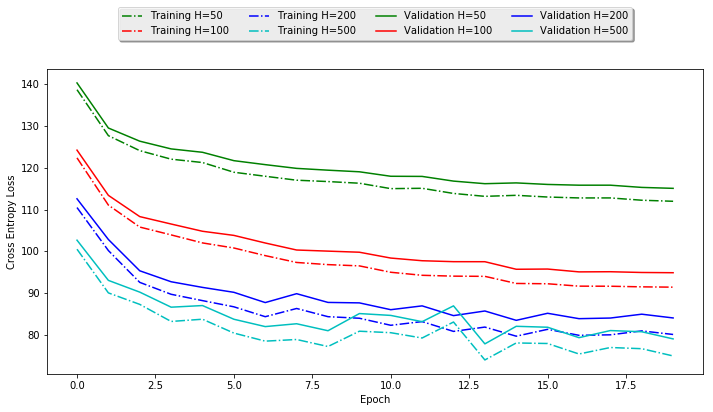

In [14]:
# Plotting convergence for k= 5,10,20
plt.figure(figsize=(10,5))

plt.plot(range(len(J_train_h50)), J_train_h50, '-.g')
plt.plot(range(len(J_train_h100)), J_train_h100, '-.r')
plt.plot(range(len(J_train_h200)), J_train_h200, '-.b')
plt.plot(range(len(J_train_h500)), J_train_h500, '-.c')

plt.plot(range(len(J_val_h50)), J_val_h50, 'g')
plt.plot(range(len(J_val_h100)), J_val_h100, 'r')
plt.plot(range(len(J_val_h200)), J_val_h200, 'b')
plt.plot(range(len(J_val_h500)), J_val_h500, 'c')

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(['Training H=50','Training H=100','Training H=200','Training H=500', 
            'Validation H=50','Validation H=100','Validation H=200', 'Validation H=500'],loc='upper center', 
           bbox_to_anchor=(0.5, 1.22),
          ncol=4, fancybox=True, shadow=True)
#plt.title('Validation Cross entropy')
plt.tight_layout()
#plt.savefig("Prob5e_DN_Autoencoder.png",dpi=200)